<a href="https://colab.research.google.com/github/ranicahyoja/salary-classification/blob/main/Salary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING MODULES

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
sns.set_style("whitegrid")
!pip install feature_engine
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from feature_engine.selection import DropConstantFeatures, SmartCorrelatedSelection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 11.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# LOADING DATA

In [ ]:
data = pd.read_csv('<salary.csv>')

# BASIC INFORMATION GAINING

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17772 entries, 0 to 17771
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             17772 non-null  int64  
 1   workclass       17772 non-null  object 
 2   fnlwgt          17772 non-null  int64  
 3   education       17772 non-null  object 
 4   education-num   17772 non-null  int64  
 5   marital-status  17772 non-null  object 
 6   occupation      17772 non-null  object 
 7   relationship    17772 non-null  object 
 8   race            17771 non-null  object 
 9   sex             17771 non-null  object 
 10  capital-gain    17771 non-null  float64
 11  capital-loss    17771 non-null  float64
 12  hours-per-week  17771 non-null  float64
 13  native-country  17771 non-null  object 
 14  salary          17771 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.0+ MB


In [ ]:
df.duplicated().sum()

0

Terdapat 24 data yang duplikat sehingga perlu dihapus.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Unique values

for ele in df.columns:
    if df[ele].dtypes!="int64":
        print("{} \n: {}".format(ele, df[ele].unique()))
        print("="*50)

workclass 
: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education 
: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status 
: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship 
: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative' ' ']
race 
: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'
 nan]
sex 
: [' Male' ' Female' nan]
capital-gain 
: [ 2174.     

Terdapat banyak missing value dari data yang bertanda "?", data ini akan ditangani pada tahap pre-processing data

# EDA (Exploratory Data Analysis)

### Semakin berumur, semakin tinggi penghasilan

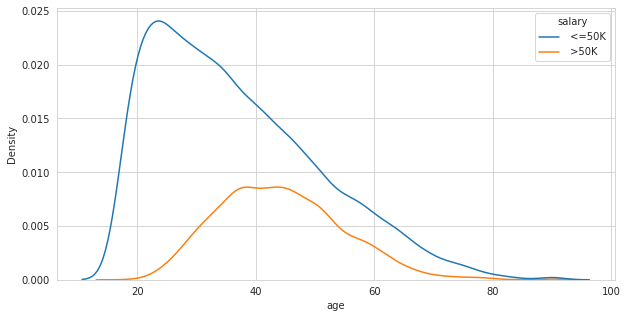

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = df, x = 'age',hue='salary')
plt.show()

Tidak benar 100%. Pada awal dua puluhan orang mulai menghasilkan lebih banyak uang sampai puncaknya pada usia empat puluhan.

### Semakin tinggi pendidikan, semakin tinggi penghasilan

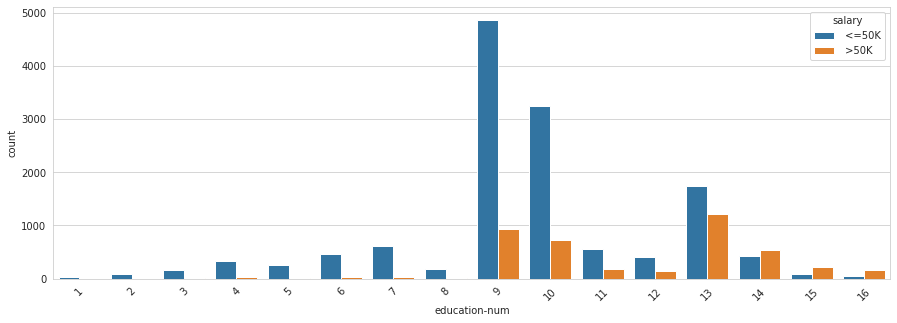

In [ ]:
fig = plt.figure(figsize=(15,5))
g = sns.countplot(data = df, x='education-num', hue='salary')
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.show()

Benar, namun baru dimulai pada tingkat pendidikan 14 yaitu gelar Sarjana (Bachelors).

### Private, sektor kerja yang mendominasi

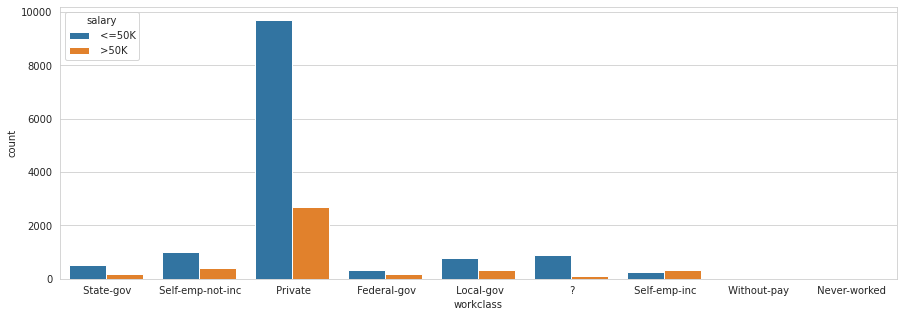

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data = df, x='workclass', hue="salary")

Dapat dilihat bahwa sektor kerja Private mendominasi data penghasilan karyawan sehingga terlihat membayar gaji karyawan paling banyak

### Prof-speciality, pekerjaan yang paling mendominasi

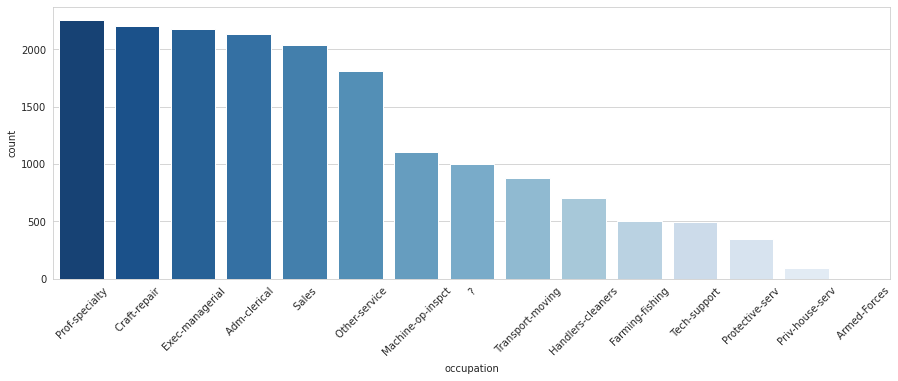

In [ ]:
fig = plt.figure(figsize=(15,5))
g = sns.countplot(data = df, x='occupation', order=df["occupation"].value_counts().index, palette="Blues_r")
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.show()

### Data label tidak seimbang

 <=50K    13510
 >50K      4254
Name: salary, dtype: int64


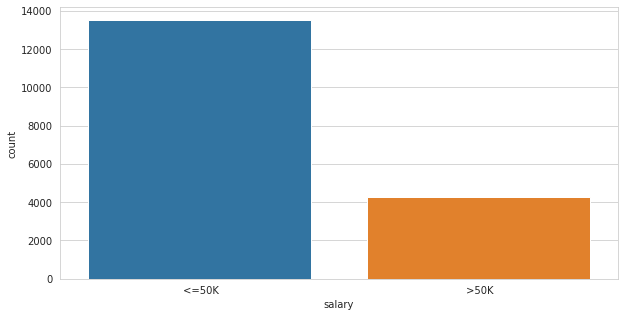

In [ ]:
fig = plt.figure(figsize=(10,5))
print(df["salary"].value_counts())
sns.countplot(data = df, x="salary")

Terjadi imbalance pada data, dapat kita lihat hampir 76% dari data berlabel "<=50K" dan 24% ">50K". Masalah ini akan ditangani dengan metode SMOTE pada tahap preprocessing

# DATA PREPROCESSING

### Menghapus data duplikat

note: codingannya ada di atas

### Mengatasi data yang hilang

Menghilangkan nilai '?'

In [ ]:
data1 = df.drop(df.index[df['workclass'] == " ?"])
data1 = data1.drop(data1.index[data1['occupation'] == " ?"])
data1 = data1.drop(data1.index[data1['native-country'] == " ?"])

In [ ]:
for ele in data1.columns:
    if data1[ele].dtypes!="int64":
        print("{} \n: {}".format(ele, data1[ele].unique()))
        print("="*50)

workclass 
: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education 
: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital-status 
: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship 
: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race 
: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex 
: [' Male' ' Female']
native-country 
: [' United-States' ' Cuba' ' Jamaica' ' India' ' M

In [ ]:
data1.shape

(30139, 15)

### Mengatasi data kategorik

In [ ]:
def label_encoding(col, data1):
    data1[col]= LabelEncoder().fit_transform(data1[col])

In [ ]:
def onehotencoding(col, data1):
    temp = pd.get_dummies(data = data1[col], drop_first=True, prefix=f"{col}_")
    data1 = pd.concat([data1, temp], axis=1)
    data1.drop(columns=[col], axis=1, inplace=True)
    return data1

In [ ]:
categorical_col = ["workclass","education","marital-status", "occupation", "relationship", "race", "native-country"]
binary_col = ["sex", "salary"]

In [ ]:
for col in categorical_col:
    label_encoding(col, data1)
    
for col in binary_col:
    data1 = onehotencoding(col, data1)

In [ ]:
data1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex__ Male,salary__ >50K
0,39,5,77516,9,13,4,0,1,4,2174,0,40,38,1,0
1,50,4,83311,9,13,2,3,0,4,0,0,13,38,1,0
2,38,2,215646,11,9,0,5,1,4,0,0,40,38,1,0
3,53,2,234721,1,7,2,5,0,2,0,0,40,38,1,0
4,28,2,338409,9,13,2,9,5,2,0,0,40,4,0,0


### Mengatasi pencilan

age has 168 outliers


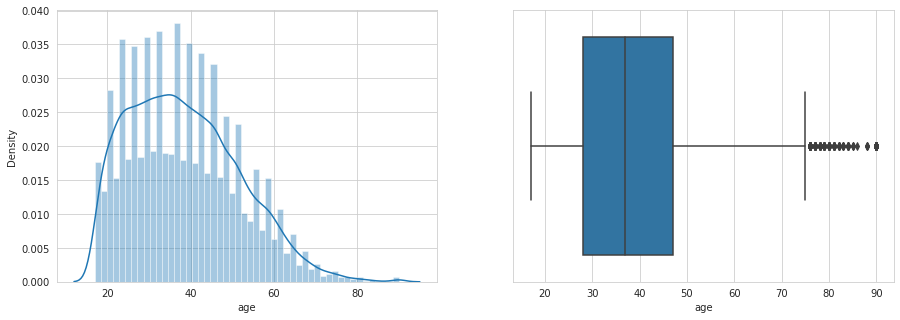

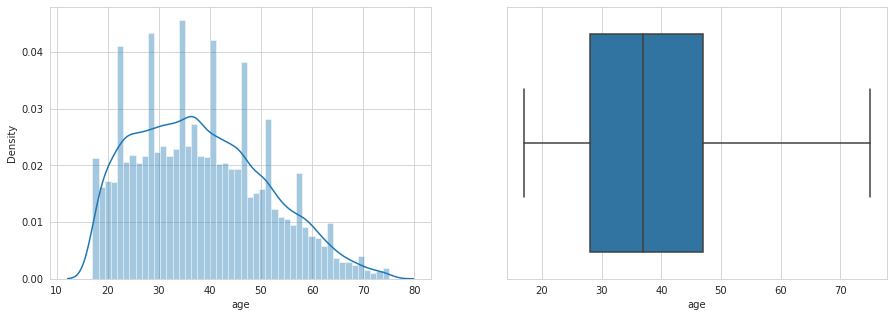

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data1["age"], kde=True, ax=ax[0])
sns.boxplot(data1["age"], ax=ax[1])

outliers = []
q1 = data1["age"].quantile(0.25)
q3 = data1["age"].quantile(0.75)
iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
    
for value in data1["age"]:
    if value > upper_bound or value < lower_bound or value <=0:
        outliers.append(value)
            
print("{} has {} outliers".format("age", len(outliers)))

mn = int(data1["age"].median())
   
for value in data1["age"]:
    if value > upper_bound or value < lower_bound:
        data1["age"] = data1["age"].replace(value, mn) #(replace(current_value, new_value))
        
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data1["age"], kde=True, ax=ax[0])
sns.boxplot(data1["age"], ax=ax[1])

Boxplot pada atribut age menunjukan adanya pencilan. Pencilan pada atribut age ditangani dengan menggantinya dengan nilai median.

### Tidak terdapat variabel yang saling berkorelasi tinggi

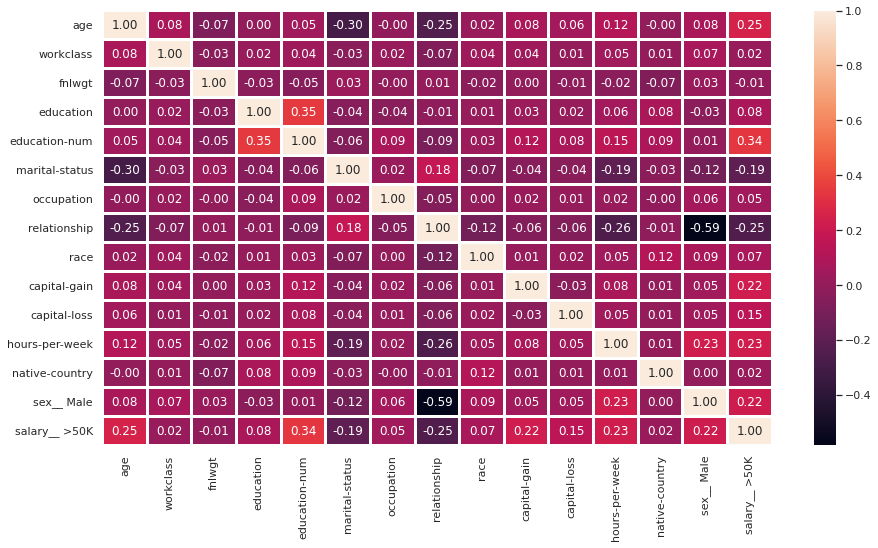

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data1.corr(), annot = True, fmt='.2f', linewidth = 2)

Tidak terdapat variabel yang saling berkorelasi tinggi, sehingga tidak perlu ada yang dihapus.

### SMOTE (Synthetic Minority Oversampling Technique)

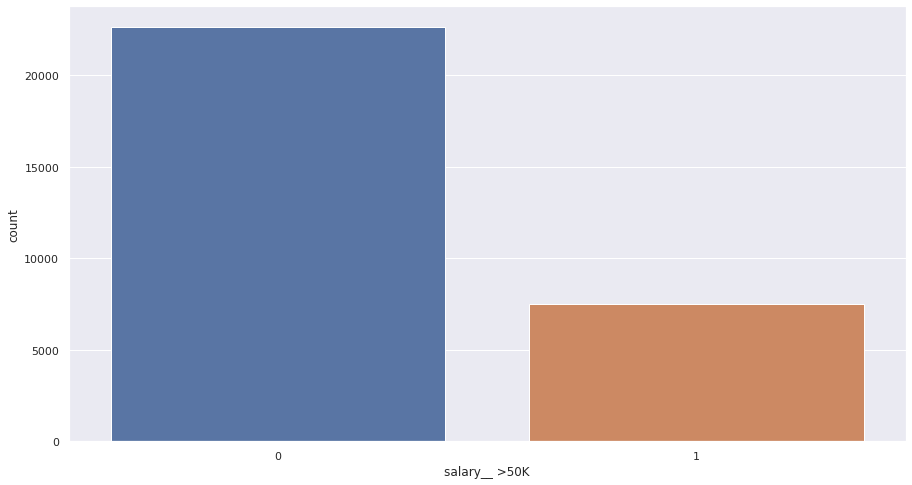

0    22633
1     7506
Name: salary__ >50K, dtype: int64


In [ ]:
X = data1.drop(['salary__ >50K'],axis=1)
y = data1['salary__ >50K']
y = pd.DataFrame({'salary__ >50K':y})
sns.countplot(data = y, x = 'salary__ >50K', y= None)
plt.show()
print(y["salary__ >50K"].value_counts())

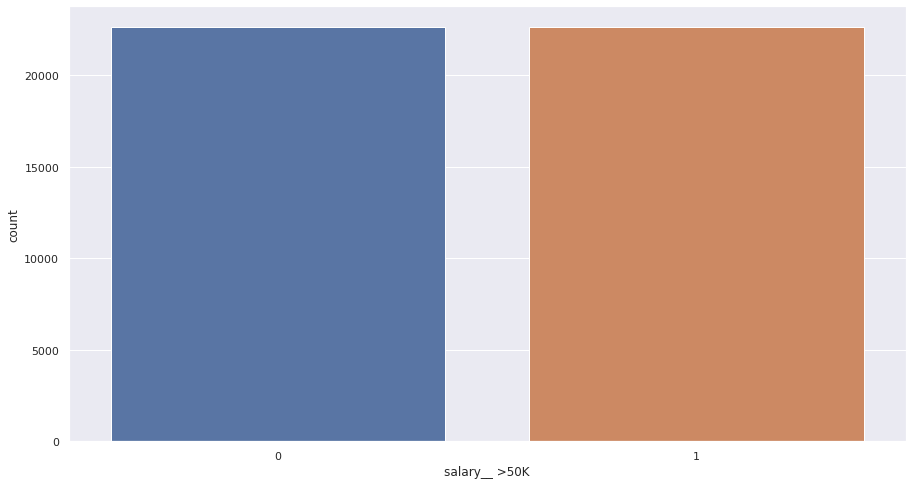

0    22633
1    22633
Name: salary__ >50K, dtype: int64


In [ ]:
smote = SMOTE(random_state = 42)

X = data1.drop(['salary__ >50K'],axis=1)
y = data1['salary__ >50K']

X,y= smote.fit_resample(X,y)
y = pd.DataFrame({'salary__ >50K':y})
sns.countplot(data = y, x = 'salary__ >50K', y= None)
plt.show()
print(y["salary__ >50K"].value_counts())

Data sudah seimbang

### Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((36212, 14), (9054, 14))

# MODELING

In [ ]:
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

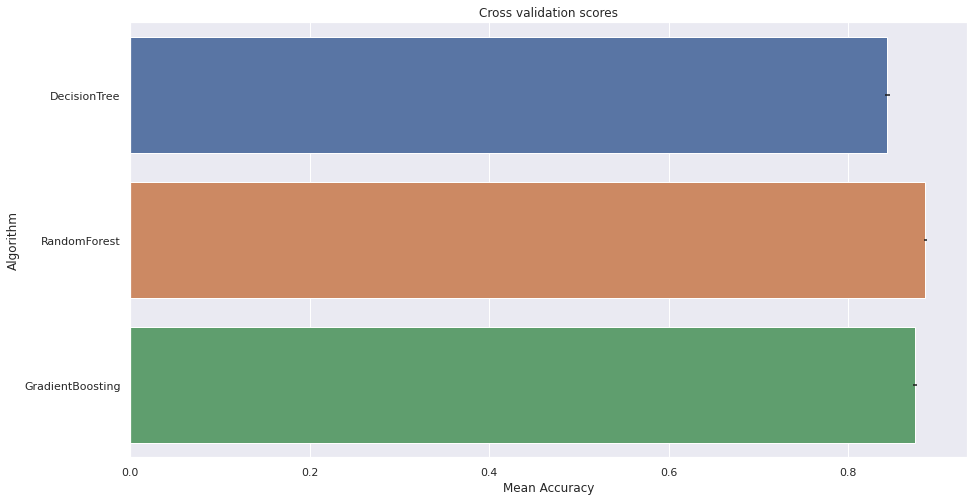

In [ ]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,X_train, y_train, scoring = "accuracy", cv =5, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Algorithm":["DecisionTree",
"RandomForest","GradientBoosting"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.843864,0.002875,DecisionTree
1,0.886391,0.002115,RandomForest
2,0.874296,0.002164,GradientBoosting


Terlihat dari perbandingan akurasi dari ketiga metode dengan Cross Validation, metode Random Forest adalah metode terbaik untuk mengklasifikasikan data penghasilan. Selanjutnya akan dilakukan hyperparameter tuning untuk semua metode.

### Desicion tree

In [ ]:
DT = DecisionTreeClassifier()
dt_param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 20)}
gsDT = GridSearchCV(DT,param_grid = dt_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
gsDT.fit(X_train , y_train)
DT_best = gsDT.best_estimator_
gsDT.best_score_

Fitting 5 folds for each of 34 candidates, totalling 170 fits


0.8683065410767499

In [ ]:
DT_best

DecisionTreeClassifier(max_depth=13)

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
             'auc': auc, 'cm': cm}

DT_best_eval =  evaluate_model(DT_best, X_test, y_test)
print('Accuracy:', DT_best_eval['acc'])
print('Precision:', DT_best_eval['prec'])
print('Recall:', DT_best_eval['rec'])
print('F1 Score:', DT_best_eval['f1'])
print('Area Under Curve:', DT_best_eval['auc'])
print('Confusion Matrix:\n', DT_best_eval['cm'])

Accuracy: 0.8678137651821862
Precision: 0.8563252417604105
Recall: 0.8824486475493187
F1 Score: 0.8691907051282052
Area Under Curve: 0.9345442014244847
Confusion Matrix:
 [[4235  728]
 [ 578 4339]]


Parameter terbaik adalah max_depth=13 dengan akurasi 86.78%

### Random forest

In [ ]:
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators" :[100,300],
    "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=5,scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train , y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


0.8938910959093584

In [ ]:
RFC_best

RandomForestClassifier(bootstrap=False, max_features=1, min_samples_split=10)

In [ ]:
RFC_best_eval =  evaluate_model(RFC_best, X_test, y_test)
print('Accuracy:', RFC_best_eval['acc'])
print('Precision:', RFC_best_eval['prec'])
print('Recall:', RFC_best_eval['rec'])
print('F1 Score:', RFC_best_eval['f1'])
print('Area Under Curve:', RFC_best_eval['auc'])
print('Confusion Matrix:\n', RFC_best_eval['cm'])

Accuracy: 0.8946356275303644
Precision: 0.8939024390243903
Recall: 0.8944478340451495
F1 Score: 0.8941750533699299
Area Under Curve: 0.9614522491861784
Confusion Matrix:
 [[4441  522]
 [ 519 4398]]


Parameter terbaik adalah  dengan akurasi 89.46%

### Gradient Boosting

In [ ]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
                'n_estimators' : [100,200,300],
                'learning_rate': [0.1, 0.05, 0.01],
                'max_depth': [4, 8],
                'min_samples_leaf': [100,150],
                'max_features': [0.3, 0.1]
}
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5,scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train, y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


0.900040547304078

In [ ]:
GBC_best

GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)

In [ ]:
GBC_eval =  evaluate_model(GBC_best, X_test, y_test)
print('Accuracy:', GBC_eval['acc'])
print('Precision:', GBC_eval['prec'])
print('Recall:', GBC_eval['rec'])
print('F1 Score:', GBC_eval['f1'])
print('Area Under Curve:', GBC_eval['auc'])
print('Confusion Matrix:\n', GBC_eval['cm'])

Accuracy: 0.9027327935222672
Precision: 0.9069958847736626
Recall: 0.8964815944681717
F1 Score: 0.9017080904162831
Area Under Curve: 0.9689963611547088
Confusion Matrix:
 [[4511  452]
 [ 509 4408]]


Parameter terbaik adalah max_depth=8, max_features=0.3, min_samples_leaf=100, n_estimators=300 dengan akurasi 90.27%

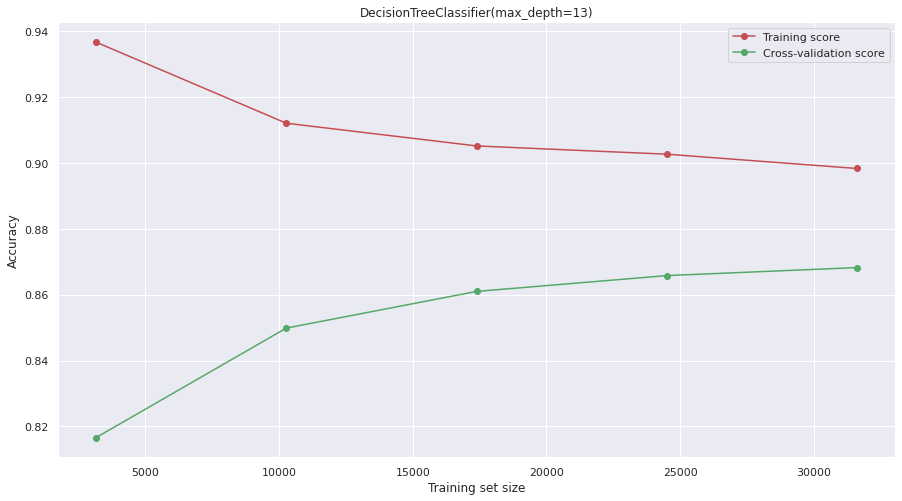

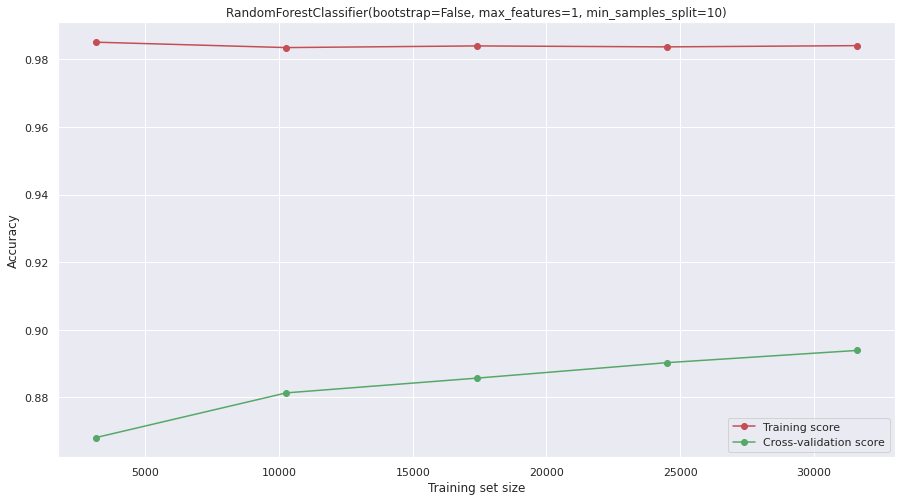

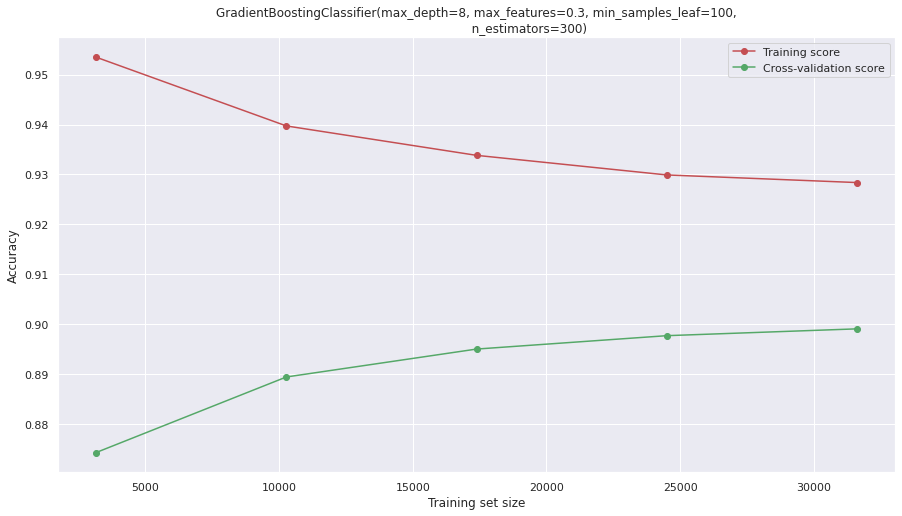

In [ ]:
def plot_learning_curve(models , X , y):
        for model in models :
            train_sizes , train_scores , test_scores =learning_curve(model ,X , y , n_jobs=-1 )
            train_scores_mean = np.mean(train_scores ,axis = 1)
            test_scores_mean = np.mean(test_scores ,axis=1)
            plt.plot(train_sizes , train_scores_mean , 'o-' , color ='r' , label = 'Training score')
            plt.plot(train_sizes , test_scores_mean , 'o-' , color ='g' , label = 'Cross-validation score')
            plt.xlabel('Training set size')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.title(model)
            plt.show()
plot_learning_curve([DT_best,RFC_best,GBC_best] , X_train , y_train)

Jika dilihat dari s

### Features importances

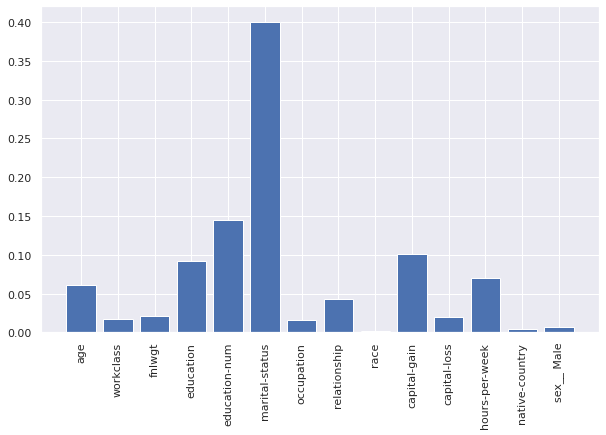

In [ ]:
clf = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 13)
clf.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(X.columns, clf.feature_importances_)
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

In [ ]:
import graphviz 
fn=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'sex__ Male']
cn=['<=50K','>50K']
data = tree.export_graphviz(clf,out_file=None,
               feature_names = fn, 
               class_names=cn,
               filled = True);
graph = graphviz.Source(data)
graph.render("tree")

'tree.pdf'